In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df.Sex = df.Sex.map({'male': 1, 'female': 0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Cabin column has 687 Nan values out of 891, So probably the best thing to do is drop the column
df.drop('Cabin', axis=1, inplace=True)

In [7]:
df.shape

(891, 11)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
df['Embarked'].mode()

0    S
dtype: object

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.Embarked = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [12]:
# Fill the Nan in Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop the unnecessary columns
df.drop(['Name', 'Ticket'], axis=1, inplace=True)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,1,27.000000,0,0,13.00,1
887,888,1,1,0,19.000000,0,0,30.00,1
888,889,0,3,0,29.699118,1,2,23.45,1
889,890,1,1,1,26.000000,0,0,30.00,2
890,891,0,3,1,32.000000,0,0,7.75,0


In [16]:
df.shape

(891, 9)

In [17]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

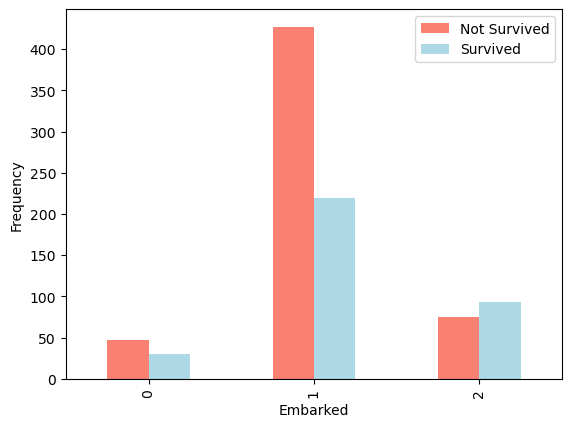

In [18]:
# Let's visualize our data
sub_df = pd.crosstab(df.Embarked, df.Survived)
sub_df.plot(kind='bar', color=['salmon', 'lightblue'])
plt.legend(['Not Survived', 'Survived'])
plt.ylabel('Frequency')
plt.xlabel('Embarked')
plt.show();

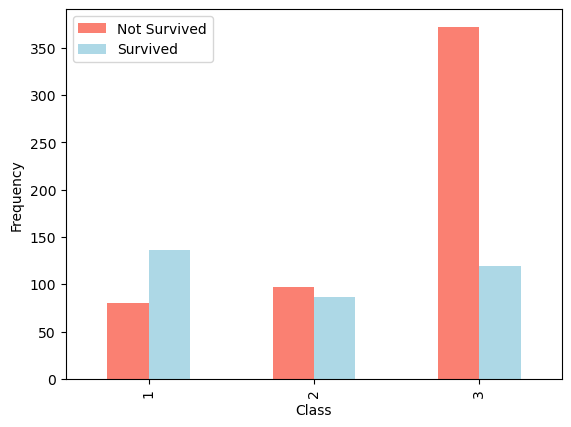

In [19]:
sub_df = pd.crosstab(df.Pclass, df.Survived)
sub_df.plot(kind='bar', color=['salmon', 'lightblue'])
plt.legend(['Not Survived', 'Survived'])
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.show();

In [20]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

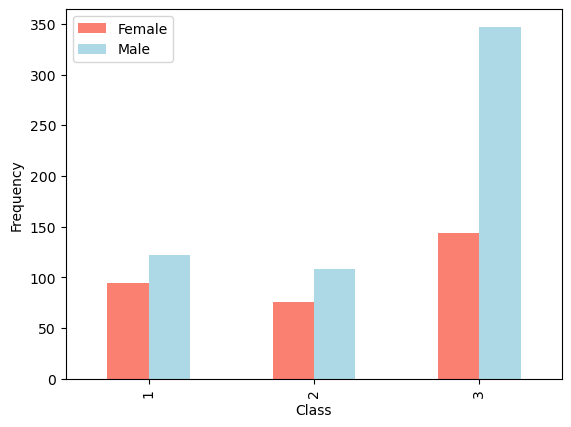

In [21]:
sub_df = pd.crosstab(df.Pclass, df.Sex)
sub_df.plot(kind='bar', color=['salmon', 'lightblue'])
plt.legend(['Female', 'Male'])
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.show();

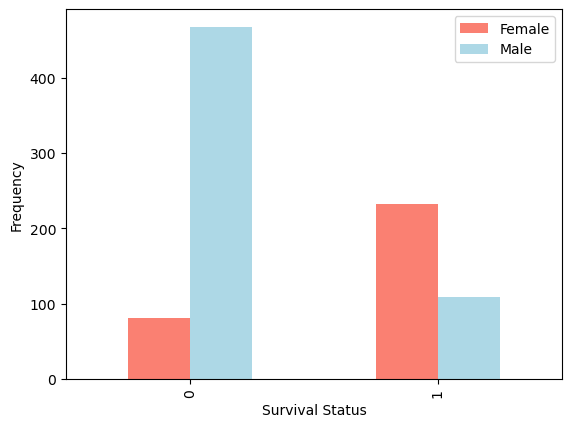

In [22]:
sub_df = pd.crosstab(df.Survived, df.Sex)
sub_df.plot(kind='bar', color=['salmon', 'lightblue'])
plt.legend(['Female', 'Male'])
plt.ylabel('Frequency')
plt.xlabel('Survival Status')
plt.show();

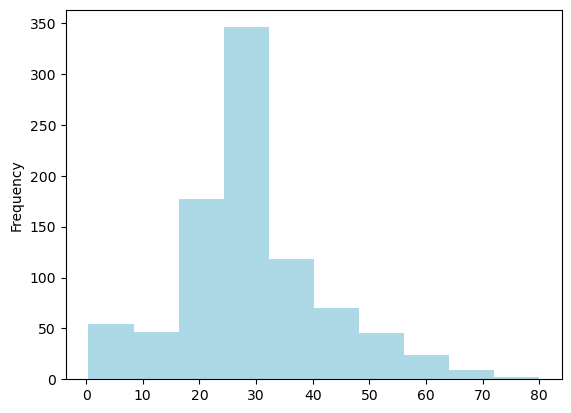

In [23]:
df['Age'].plot(kind='hist', color='lightblue')
plt.show()

In [24]:
df['Age'].mean()

29.69911764705882

In [25]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,1
1,2,1,1,0,38.000000,1,0,71.2833,2
2,3,1,3,0,26.000000,0,0,7.9250,1
3,4,1,1,0,35.000000,1,0,53.1000,1
4,5,0,3,1,35.000000,0,0,8.0500,1
5,6,0,3,1,29.699118,0,0,8.4583,0
6,7,0,1,1,54.000000,0,0,51.8625,1
7,8,0,3,1,2.000000,3,1,21.0750,1
8,9,1,3,0,27.000000,0,2,11.1333,1
9,10,1,2,0,14.000000,1,0,30.0708,2


In [26]:
# Split the data
from sklearn.model_selection import train_test_split
np.random.seed(2)

# Create x and y Dataframes
x = df.drop('Survived', axis=1)
y = df['Survived']

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)
X = pd.DataFrame(X)

x_tr, x_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.2, random_state=0)
x_tr.shape, x_tst.shape, y_tr.shape, y_tst.shape

((712, 8), (179, 8), (712,), (179,))

In [27]:
# Build a Classification Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)

# Fit the model
lr.fit(x_tr, y_tr)

LogisticRegression()

In [28]:
# Evaluate the metrics
lr.score(x_tr, y_tr), lr.score(x_tst, y_tst)

(0.8019662921348315, 0.7988826815642458)

In [29]:
# Creating a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_tr, y_tr)

RandomForestClassifier()

In [30]:
rfc.score(x_tr, y_tr), rfc.score(x_tst, y_tst)

(1.0, 0.8603351955307262)

In [31]:
# Cross Validating the score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(rfc, X, y, cv=5, scoring=None)
cv

array([0.70949721, 0.79213483, 0.85955056, 0.82022472, 0.85955056])

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1': round(f1, 2)
    }
    
    print(f"Accuracy: {metric_dict['accuracy']}")
    print(f"Precision: {metric_dict['precision']}")
    print(f"Recall: {metric_dict['recall']}")
    print(f"F1 Score: {metric_dict['f1']}")
    
    return metric_dict

In [33]:
y_preds = rfc.predict(x_tst)
evaluate_preds(y_tst, y_preds)

Accuracy: 0.86
Precision: 0.89
Recall: 0.72
F1 Score: 0.8


{'accuracy': 0.86, 'precision': 0.89, 'recall': 0.72, 'f1': 0.8}

In [34]:
# # Display the Confusion Matrix
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# matrix = confusion_matrix(y_tst, y_preds, labels=lr.classes_)
# graph = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=lr.classes_)

# graph.plot()
# plt.show()

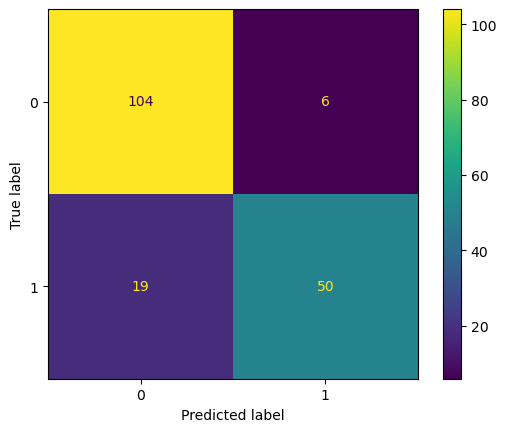

In [35]:
# Display the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matrix = confusion_matrix(y_tst, y_preds, labels=rfc.classes_)
graph = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rfc.classes_)

graph.plot()
plt.show()

In [36]:
# # Feature Importance

# # Feature importance is another way of asking, 'which features contribute the most to the outcomes of the model and how did they contribute?'
# # Finding feature importance is different for each ML Model
# feature_dict = dict(zip(x.columns, list(lr.coef_[0])))
# feature_dict

In [37]:
# features = pd.DataFrame(feature_dict, index=[0])
# features.T.plot.bar(title='Feature Importance' , color='lightblue', legend=False)
# plt.show()

In [38]:
# Cleaning the test dataset
np.random.seed(2)
test = pd.read_csv('/kaggle/input/titanic/test.csv')
# Dropping the unnecessary features
test.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
# Filling the missing data
test['Age'] = test['Age'].fillna(test.Age.mean())
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test['Embarked'] = test['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})
test['Fare'] = test.Fare.fillna(test.Fare.mean())
# Scale the data
scaler.fit(test)
X_test = scaler.transform(test)
X_test = pd.DataFrame(X_test)
# Make predictions
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

0.8350461133069829 



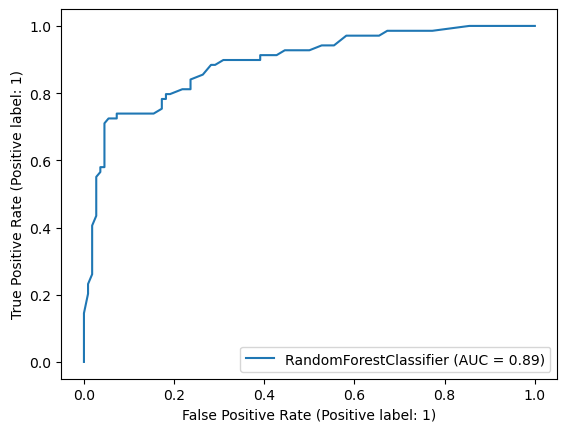

In [39]:
# Import ROC curve from the sklearn.metrics

# Plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay, roc_auc_score
print(roc_auc_score(y_tst, y_preds), '\n')
RocCurveDisplay.from_estimator(rfc, x_tst, y_tst);

In [40]:
np.random.seed(2)
output = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
rfc.score(X_test, output['Survived'])

0.8827751196172249

In [41]:
output.Survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [42]:
# # Tuning the model
# # Hyperparameters
# from sklearn.model_selection import GridSearchCV
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# grid = dict(solver=solvers, penalty=penalty, C=c_values)
# gsv = GridSearchCV(estimator=lr, param_grid=grid, cv=5, verbose=True)
# gsv.fit(x_tr, y_tr)

In [43]:
pd.crosstab(pd.DataFrame(y_pred)[0], output.Survived)

Survived,0,1
0,,
0,248,31
1,18,121


In [44]:
# gsv.best_params_

In [45]:
# gsv.score(x_tst, y_tst)

In [46]:
# y_preds = gsv.predict(X_test)
# len(y_preds)

In [47]:
# RandomizedSearchCV & GridSearchCV for RandomForestClassifier
grid = {
    'n_estimators': [10, 100, 200, 500, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rsv = RandomizedSearchCV(estimator=rfc, param_distributions=grid, n_iter=10, cv=5, verbose=2)
rsv.fit(x_tr, y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1200]},
                   verbose=2)

In [49]:
rsv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [50]:
rsv.score(x_tr, y_tr), rsv.score(x_tst, y_tst)

(0.9311797752808989, 0.8491620111731844)

In [51]:
rsv.score(X_test, output['Survived'])

0.9043062200956937

In [52]:
grid2 = {
    'n_estimators': [500, 700],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto'],
    'max_depth': [None, 5, 10]
}

In [53]:
gsv = GridSearchCV(estimator=rfc, param_grid=grid2, cv=5, verbose=True)
gsv.fit(x_tr, y_tr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 6],
                         'n_estimators': [500, 700]},
             verbose=True)

In [54]:
gsv.score(x_tr, y_tr), gsv.score(x_tst, y_tst), gsv.score(X_test, output.Survived)

(0.9353932584269663, 0.8491620111731844, 0.8995215311004785)

In [55]:
prediction = gsv.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
pd.crosstab(pd.DataFrame(prediction)[0], output.Survived)

Survived,0,1
0,,
0,252,28
1,14,124


In [57]:
submission = output
submission['Survived'] = list(map(int, prediction))
submission.to_csv('submission.csv', index=False)

In [58]:
# Save the model and Load it
# import pickle
# pickle.dump(lr, open('Model.pkl', 'wb'))
# loaded_model = pickle.load(open('Model.pkl', 'rb'))